# PARTE 1: TAREFAS DE MANIPULACAO

In [1]:
from __future__ import print_function
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
import os
import splitfolders

## Tarefa 1.1

In [2]:
def get_img_opencv(img_address):
    img = cv2.imread(img_address)
    return img 

def get_img_pillow(img_address):
    img = Image.open(img_address)
    return img
    
def get_img_plt(img_address):
    pil_img = Image.open(img_address)
    return pil_img

In [3]:
img_cv = get_img_opencv("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
cv2.imshow("image", img_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img_pil = get_img_pillow("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
img_pil.show()

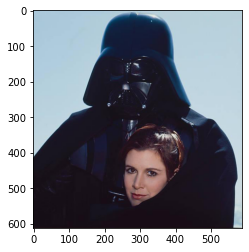

In [5]:
img_plt = get_img_plt("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(img_plt)

## Tarefa 1.2

In [6]:
def convert_to_gray_np(img_address):
    rgb_img = get_img_plt(img_address)
    weights_rgb_to_gray = [0.2989, 0.5870, 0.1140]
    gray_img = np.dot(rgb_img, weights_rgb_to_gray)
    return gray_img

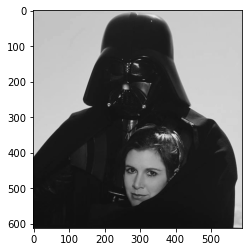

In [7]:
gray_img = convert_to_gray_np("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(gray_img, cmap = plt.get_cmap("gray"))

In [8]:
#converter de rgb para preto e branco com opencv
rgb_img = get_img_opencv("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("image", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

A biblioteca openCV utiliza o formato BGR

## Tarefa 1.3

In [9]:
def flip_image_with_np(img_address):
    img = get_img_plt(img_address)
    flip_img = np.fliplr(img)
    return flip_img

def random_bright_with_np(img_address):
    img = get_img_plt(img_address)
    np_img = np.array(img)
    val = random.random()
    brightness_value = 160*val - 80
    bright_np = np_img + brightness_value
    np.clip(bright_np, a_min = 0, a_max = 255., out = bright_np)
    bright_img = np.array(bright_np, dtype = "uint8")
    return  bright_img
    
def flip_image(img_address):
    img = get_img_plt(img_address)
    tensor_img = tf.keras.preprocessing.image.img_to_array(img, dtype = 'uint8')
    flip_img = tf.image.flip_left_right(tensor_img)    
    return flip_img

def random_rotate(img_address):
    img = get_img_plt(img_address)
    tensor_img = tf.keras.preprocessing.image.img_to_array(img, dtype = 'uint8')
    rotated_img = tf.keras.preprocessing.image.random_rotation(tensor_img, 90, row_axis=0, col_axis=1, channel_axis=2)
    return rotated_img

def random_zoom(img_address):
    img = get_img_plt(img_address)
    tensor_img = tf.keras.preprocessing.image.img_to_array(img, dtype = 'uint8')
    zoomed_img = tf.keras.preprocessing.image.random_zoom(tensor_img, ((0.5), (0.6)), row_axis=0, col_axis=1, channel_axis=2)
    return zoomed_img

def random_contrast(img_address):
    img = get_img_plt(img_address)
    tensor_img = tf.keras.preprocessing.image.img_to_array(img, dtype = 'uint8')
    contrasted_img = tf.image.random_contrast(tensor_img, 0.2, 0.5)    
    return contrasted_img

def random_bright(img_address):
    img = get_img_plt(img_address)
    tensor_img = tf.keras.preprocessing.image.img_to_array(img, dtype = 'uint8')
    bright_img = tf.image.random_brightness(tensor_img, 0.4)    
    return bright_img

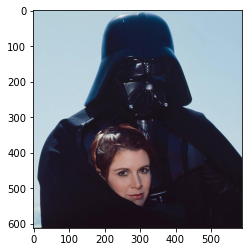

In [10]:
flip_img = flip_image_with_np("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(flip_img)

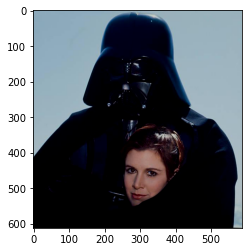

In [11]:
bright_img =random_bright_with_np("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(bright_img)

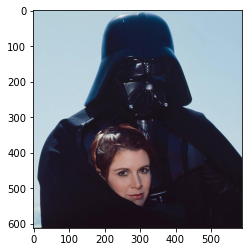

In [12]:
flip_img = flip_image("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(flip_img)

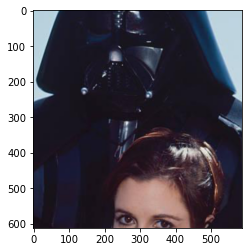

In [13]:
zoomed_img = random_zoom("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(zoomed_img)

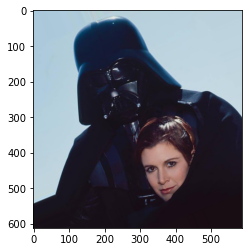

In [14]:
rotated_img = random_rotate("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(rotated_img)

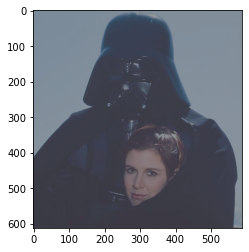

In [15]:
contrasted_img = random_contrast("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(contrasted_img)

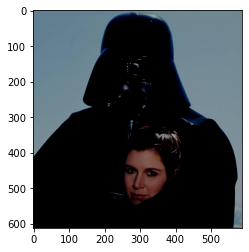

In [16]:
bright_img = random_bright("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
plt.imshow(bright_img)

In [17]:
def image_augmentation(img_address):
    return (flip_image(img_address), random_rotation(img_address), random_zoom(img_address), random_contrast(img_address), random_bright(img_address))

## Tarefa 1.4

(<AxesSubplot:title={'center':'Blur'}>,
 Text(0.5, 1.0, 'Blur'))

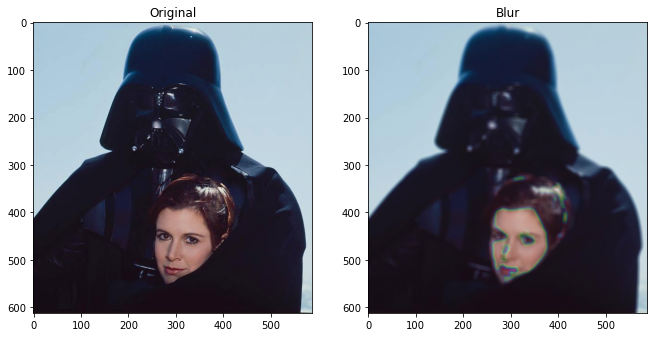

In [18]:
#Blur
img = get_img_opencv("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
figure_size = 9
blur_img = cv2.blur(img, (figure_size, figure_size))
blur_img = cv2.cvtColor(blur_img, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(blur_img),plt.title('Blur')

(<AxesSubplot:title={'center':'Gaussian blur'}>,
 Text(0.5, 1.0, 'Gaussian blur'))

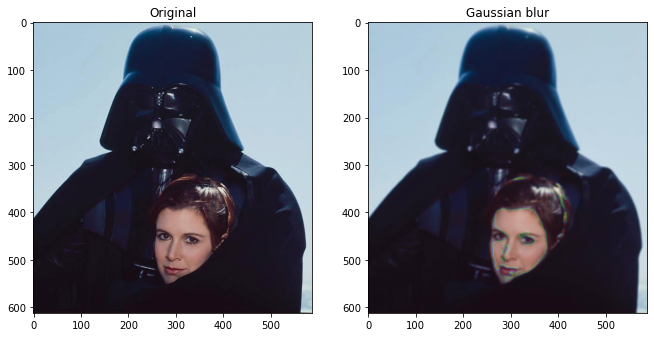

In [19]:
#Gaussian blur
img = get_img_opencv("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
figure_size = 9
gaussian_img = cv2.GaussianBlur(img, (figure_size, figure_size), 0)
gaussian_img = cv2.cvtColor(gaussian_img, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(gaussian_img),plt.title('Gaussian blur')

(<AxesSubplot:title={'center':'Median blur'}>,
 Text(0.5, 1.0, 'Median blur'))

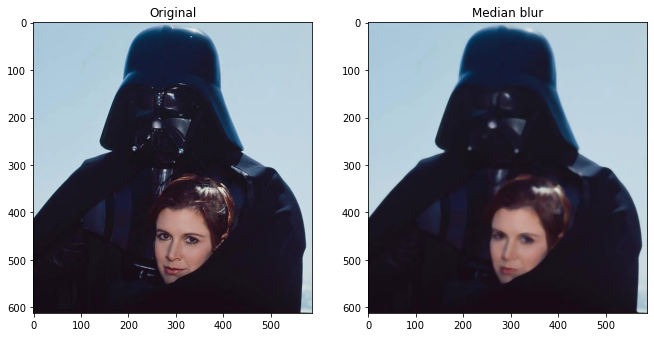

In [20]:
#Median blur
img = get_img_opencv("data/Darth Vader/00e4014787b9fb90ee3791ec9b8a224361064b41.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
figure_size = 9
median_img = cv2.medianBlur(img, figure_size)
median_img = cv2.cvtColor(median_img, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(median_img),plt.title('Median blur')

(<AxesSubplot:title={'center':'Vertical line'}>,
 Text(0.5, 1.0, 'Vertical line'))

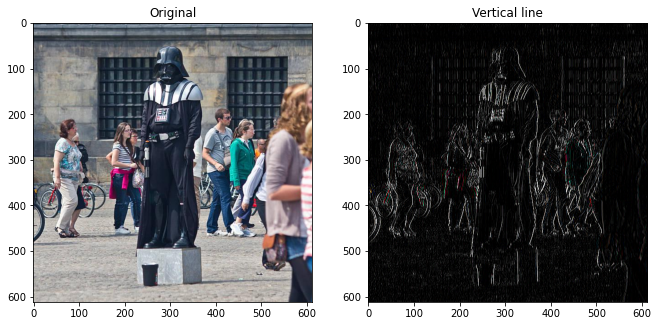

In [21]:
# -1 2 -1
# -1 2 -1
# -1 2 -1
# esse kernel é utilizado para deteccao de linhas verticais na imagem

img = get_img_opencv("data/Darth Vader/5a5fd591577a7ddb0db3d07915e79d047beba95b.jpg")
kernel = np.asmatrix([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
vertical_img = cv2.filter2D(img, -1, kernel)
vertical_img = cv2.cvtColor(vertical_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(vertical_img),plt.title('Vertical line')


(<AxesSubplot:title={'center':'Horizontal line'}>,
 Text(0.5, 1.0, 'Horizontal line'))

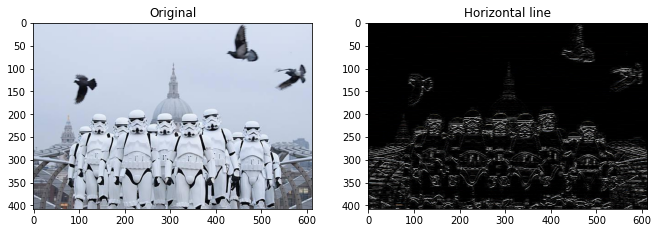

In [22]:
# -1 -1 -1
#  2  2  2
# -1 -1 -1
# esse kernel é utilizado para deteccao de linhas horizontais na imagem

img = get_img_opencv("data/Stormtrooper/1d766c20b38d2d95b52b437bb4f4a6363c6cb0ae.jpg")
kernel = np.asmatrix([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
horizontal_img = cv2.filter2D(img, -1, kernel)
horizontal_img = cv2.cvtColor(horizontal_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(horizontal_img),plt.title('Horizontal line')


# PARTE 2: TAREFAS DE CLASSIFICACAO

## Tarefa 2.1

In [23]:
splitfolders.ratio('data', output="data_splitted", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 1827 files [00:01, 1109.83 files/s]


## Tarefa 2.2

In [24]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
                                                                rotation_range = 30, 
                                                                width_shift_range = 0.3, 
                                                                height_shift_range = 0.3, 
                                                                brightness_range = (0.6, 1.2), 
                                                                zoom_range = 0.3, 
                                                                horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(directory = "data_splitted/train/", 
                                                    shuffle = True,
                                                    target_size = (64, 64), 
                                                    batch_size = 32)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory(directory = "data_splitted/val/", 
                                                        shuffle = True, 
                                                        target_size = (64, 64), 
                                                        batch_size = 32)

test_generator = test_datagen.flow_from_directory(directory = "data_splitted/test/", 
                                                  shuffle = True, 
                                                  target_size = (64, 64))

Found 1461 images belonging to 3 classes.
Found 181 images belonging to 3 classes.
Found 185 images belonging to 3 classes.


## Tarefa 2.3

In [25]:
number_of_classes = 3
number_of_features = 64 * 64 * 3

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(number_of_classes, activation = "sigmoid", input_dim = number_of_features))
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=['accuracy'])
model.fit(x = train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
46/46 [==============================] - 6s 126ms/step - loss: 4.1556 - accuracy: 0.3785 - val_loss: 1.8945 - val_accuracy: 0.4696
Epoch 2/10
46/46 [==============================] - 5s 119ms/step - loss: 4.1598 - accuracy: 0.3655 - val_loss: 2.1466 - val_accuracy: 0.3812
Epoch 3/10
46/46 [==============================] - 5s 119ms/step - loss: 3.0736 - accuracy: 0.4285 - val_loss: 3.3464 - val_accuracy: 0.5193
Epoch 4/10
46/46 [==============================] - 6s 123ms/step - loss: 3.4037 - accuracy: 0.4004 - val_loss: 2.1635 - val_accuracy: 0.4862
Epoch 5/10
46/46 [==============================] - 5s 116ms/step - loss: 3.4677 - accuracy: 0.4093 - val_loss: 5.1900 - val_accuracy: 0.4696
Epoch 6/10
46/46 [==============================] - 5s 116ms/step - loss: 3.6312 - accuracy: 0.4073 - val_loss: 4.0726 - val_accuracy: 0.4751
Epoch 7/10
46/46 [==============================] - 5s 115ms/step - loss: 2.8518 - accuracy: 0.4517 - val_loss: 4.5152 - val_accuracy: 0.4696
Epoch 

In [26]:
test_loss ,test_acc = model.evaluate(x = test_generator, verbose = 2)
print(test_acc)

6/6 - 0s - loss: 2.4076 - accuracy: 0.4541
0.454054057598114


## Tarefa 2.4

In [27]:
from tensorflow.keras import layers, models

In [28]:
train_generator_cnn = train_datagen.flow_from_directory(directory = "data_splitted/train/", 
                                                    shuffle = True,
                                                    target_size = (64, 64), 
                                                    batch_size = 32,
                                                    class_mode = "sparse")

validation_generator_cnn = test_datagen.flow_from_directory(directory = "data_splitted/val/", 
                                                        shuffle = True, 
                                                        target_size = (64, 64), 
                                                        batch_size = 32,
                                                        class_mode = "sparse")

test_generator_cnn = test_datagen.flow_from_directory(directory = "data_splitted/test/", 
                                                  shuffle = True, 
                                                  target_size = (64, 64), 
                                                  class_mode = "sparse")

Found 1461 images belonging to 3 classes.
Found 181 images belonging to 3 classes.
Found 185 images belonging to 3 classes.


In [29]:
conv_model = models.Sequential()

conv_model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (64, 64, 3)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [30]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [31]:
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(64, activation = "relu"))
conv_model.add(layers.Dense(3))

In [32]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [33]:
conv_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
conv_model.fit(x = train_generator_cnn, epochs = 10, validation_data = validation_generator_cnn)

Epoch 1/10
46/46 [==============================] - 8s 160ms/step - loss: 1.0410 - accuracy: 0.4716 - val_loss: 0.9307 - val_accuracy: 0.6298
Epoch 2/10
46/46 [==============================] - 7s 154ms/step - loss: 0.9696 - accuracy: 0.5168 - val_loss: 0.8748 - val_accuracy: 0.6243
Epoch 3/10
46/46 [==============================] - 8s 163ms/step - loss: 0.8984 - accuracy: 0.6016 - val_loss: 0.8527 - val_accuracy: 0.6133
Epoch 4/10
46/46 [==============================] - 7s 157ms/step - loss: 0.8483 - accuracy: 0.6235 - val_loss: 0.8399 - val_accuracy: 0.7127
Epoch 5/10
46/46 [==============================] - 7s 156ms/step - loss: 0.8136 - accuracy: 0.6496 - val_loss: 0.6367 - val_accuracy: 0.8011
Epoch 6/10
46/46 [==============================] - 7s 153ms/step - loss: 0.7605 - accuracy: 0.6954 - val_loss: 0.5747 - val_accuracy: 0.8232
Epoch 7/10
46/46 [==============================] - 7s 155ms/step - loss: 0.7597 - accuracy: 0.6851 - val_loss: 0.7204 - val_accuracy: 0.7680
Epoch 

In [34]:
test_loss ,test_acc = conv_model.evaluate(x = test_generator_cnn, verbose = 2)
print(test_acc)

6/6 - 0s - loss: 0.4537 - accuracy: 0.8378
0.837837815284729


## Tarefa 2.5

In [35]:
train_generator_tl = train_datagen.flow_from_directory(directory = "data_splitted/train/", 
                                                    shuffle = True, 
                                                    target_size = (160, 160), 
                                                    batch_size = 32, 
                                                    class_mode = "sparse")

validation_generator_tl = test_datagen.flow_from_directory(directory = "data_splitted/val/", 
                                                        shuffle = True, 
                                                        target_size = (160, 160), 
                                                        batch_size = 32, 
                                                        class_mode = "sparse")

test_generator_tl = test_datagen.flow_from_directory(directory = "data_splitted/test/",  
                                                  shuffle = True,
                                                  target_size = (160, 160), 
                                                  class_mode = "sparse")

Found 1461 images belonging to 3 classes.
Found 181 images belonging to 3 classes.
Found 185 images belonging to 3 classes.


In [36]:
image_batch, label_batch = next(iter(train_generator_tl))

In [37]:
rescale = layers.experimental.preprocessing.Rescaling(2., offset = -1)

In [38]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (160, 160, 3), 
                                               include_top = False, 
                                               weights = "imagenet")

In [39]:
base_model.trainable = False

In [40]:
feature_batch = base_model(image_batch)

In [41]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [42]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


In [43]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = rescale(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
transfer_learning_model = tf.keras.Model(inputs, outputs)

In [44]:
transfer_learning_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_______________________________________________

In [45]:
base_learning_rate = 0.001
transfer_learning_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
transfer_learning_model.fit(x = train_generator_tl,
          epochs=10,
          validation_data=validation_generator_tl)

Epoch 1/10
46/46 [==============================] - 21s 427ms/step - loss: 0.7838 - accuracy: 0.6674 - val_loss: 0.3410 - val_accuracy: 0.8729
Epoch 2/10
46/46 [==============================] - 19s 416ms/step - loss: 0.4401 - accuracy: 0.8241 - val_loss: 0.2757 - val_accuracy: 0.9006
Epoch 3/10
46/46 [==============================] - 19s 415ms/step - loss: 0.4039 - accuracy: 0.8439 - val_loss: 0.2186 - val_accuracy: 0.9337
Epoch 4/10
46/46 [==============================] - 19s 413ms/step - loss: 0.3457 - accuracy: 0.8734 - val_loss: 0.2205 - val_accuracy: 0.9337
Epoch 5/10
46/46 [==============================] - 19s 417ms/step - loss: 0.3388 - accuracy: 0.8700 - val_loss: 0.2280 - val_accuracy: 0.9282
Epoch 6/10
46/46 [==============================] - 19s 415ms/step - loss: 0.3218 - accuracy: 0.8864 - val_loss: 0.2221 - val_accuracy: 0.9227
Epoch 7/10
46/46 [==============================] - 19s 417ms/step - loss: 0.3079 - accuracy: 0.8830 - val_loss: 0.2580 - val_accuracy: 0.9061

In [47]:
test_loss ,test_acc = transfer_learning_model.evaluate(x = test_generator_tl, verbose = 2)
print(test_acc)

6/6 - 2s - loss: 0.2830 - accuracy: 0.8865
0.8864864706993103


Podemos notar que os modelos convolucionais (accuracy = 84% e 89%), se mostraram muito superiores a regressao logistica (accuracy = 45%). Enquanto que o modelo que utilizou transfer learning (accuracy = 89%), apresentou um melhor desempenho em relacao ao modelo convencional (accuracy = 84%).